# Introducción a Imagenes Digitales
---

## Ejemplo de Separacion de Canales RGB

Saving Casitas.jpg to Casitas.jpg


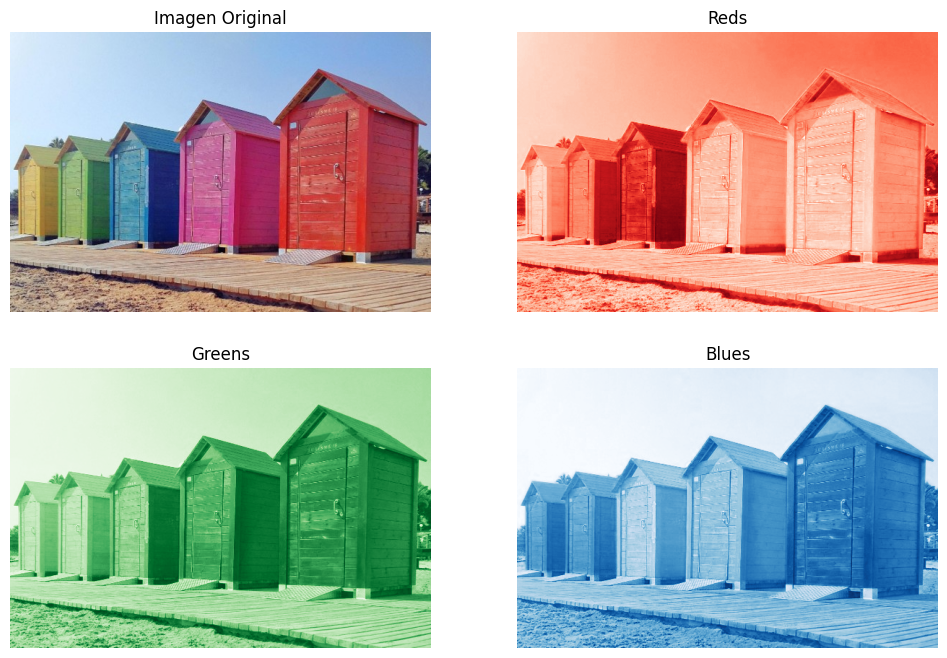

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files



DATOS_DIR = 'Datos/' # ruta a las imagenes
try:
    imgColor = io.imread(DATOS_DIR + 'Casitas.jpg')
except:
    uploaded = files.upload()
    imgColor = io.imread(list(uploaded.keys())[0])

fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # figura de 2x2
axs = axs.flatten()

# Mostrar la imagen original en la primera posición
axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

# Mostrar las imágenes en escala de colores en las posiciones restantes
C = ['Reds_r', 'Greens_r', 'Blues_r']
for p in range(3):
    axs[p + 1].imshow(imgColor[:, :, p], cmap=C[p])
    axs[p + 1].set_title(C[p][:-2])  # Titulos
    axs[p + 1].axis('off')      # Ocultar ejes
plt.show() # Muestra figura

## Ejemplo de Conversión a Tonos de Grises

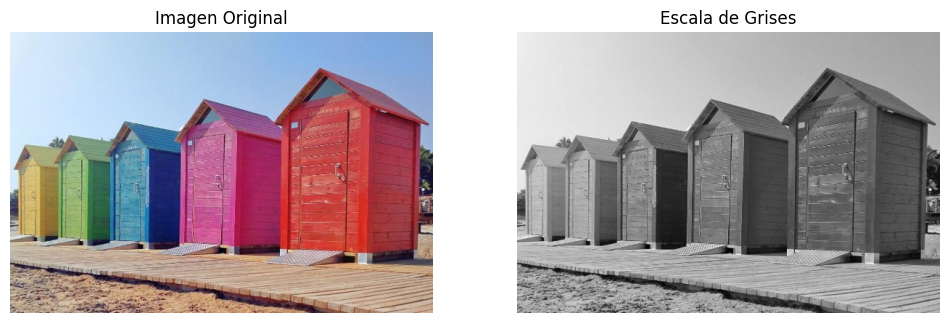

In [ ]:
from skimage import color

imgGray = color.rgb2gray(imgColor) # conversión a grises

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title('Escala de Grises')
axs[1].axis('off')  # Ocultar ejes

plt.show()

## Ejemplos de Rotación

Nota: observar el rellenado que se realiza en los pixeles que quedan "vacios" porque la imagen no puede llenarlos

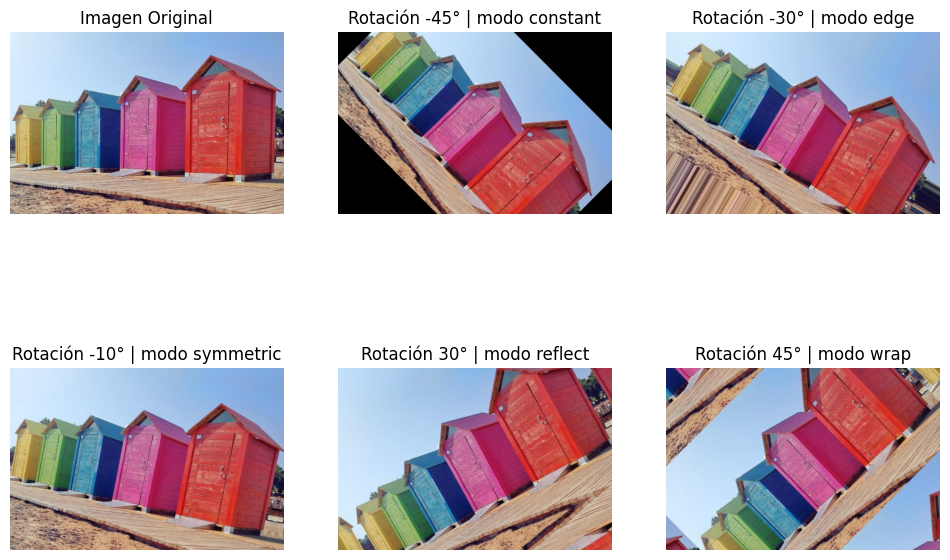

In [ ]:
from skimage import transform
mode = ['constant', 'edge', 'symmetric', 'reflect', 'wrap']
angles = [-45,-30, -10, 30, 45] # ángulos de rotación

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

for i, angle in enumerate(angles):
    imgRotated = transform.rotate(imgColor, angle, resize=False, mode=mode[i])
    #imgRotated = np.clip(imgRotated, 0, 255).astype(np.uint8)
    axs[i + 1].imshow(imgRotated)
    axs[i + 1].set_title(f'Rotación {angle}° | modo {mode[i]}')
    axs[i + 1].axis('off')  # Ocultar ejes

plt.show()

## Ejemplo de Escalado

Nota: observar que en los ejes indica los pixeles de la imagen

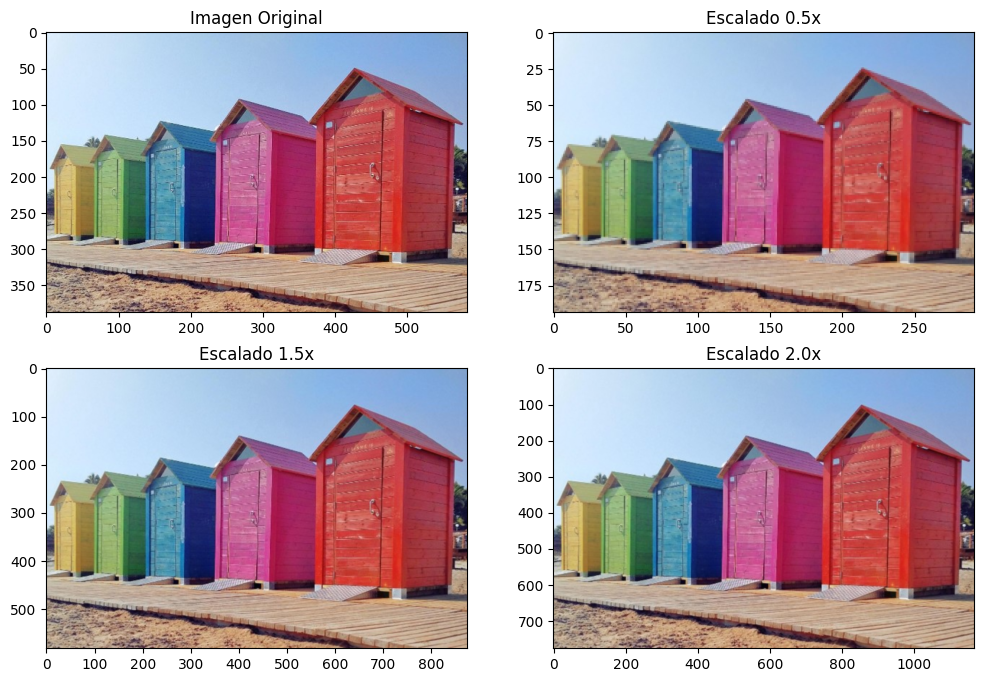

In [ ]:
scales = [0.5, 1.5, 2.0] # factores de escalado

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')

for i, scale in enumerate(scales):
    imgScaled = transform.rescale(imgColor, scale, channel_axis=-1, anti_aliasing=True)
    axs[i + 1].imshow(imgScaled)
    axs[i + 1].set_title(f'Escalado {scale}x')

plt.show()

## Ejemplo de Traslación

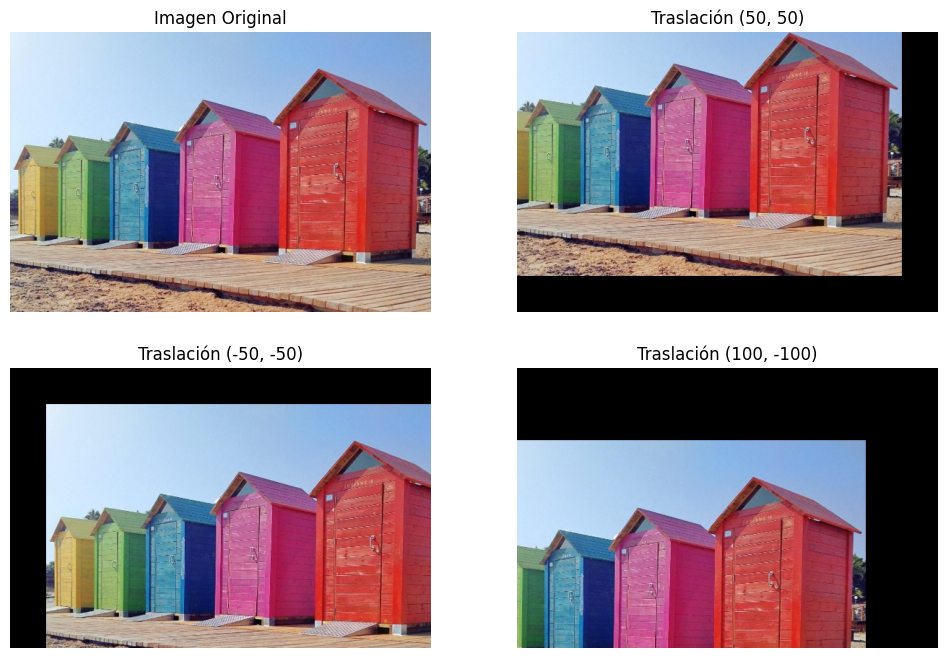

In [ ]:
translations = [(50, 50), (-50, -50), (100, -100)] # traslaciones en píxeles

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

for i, (tx, ty) in enumerate(translations):
    # matriz de transformación para la traslación
    tform = transform.SimilarityTransform(translation=(tx, ty))

    imgTranslated = transform.warp(imgColor, tform, preserve_range=True) # transformación

    axs[i + 1].imshow(imgTranslated.astype(np.uint8))
    axs[i + 1].set_title(f'Traslación ({tx}, {ty})')
    axs[i + 1].axis('off')  # Ocultar ejes

plt.show()

## Ejemplo de Brillo

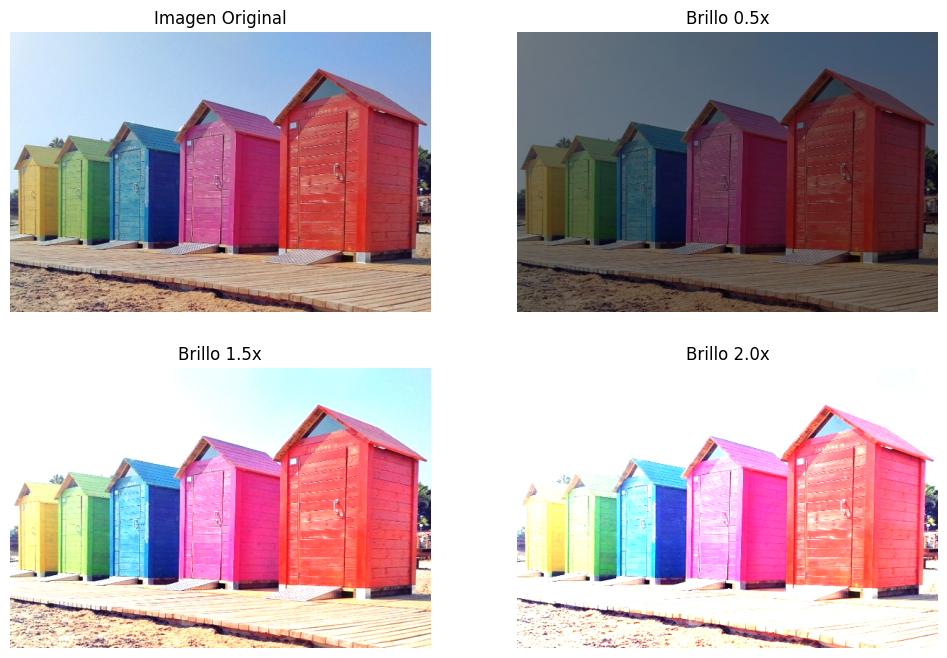

In [ ]:
brightness_factors = [0.5, 1.5, 2.0] # factores de brillo

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

for i, factor in enumerate(brightness_factors):
    # Ajusta brillo de la imagen
    imgBright = np.clip(imgColor * factor, 0, 255).astype(np.uint8)

    axs[i + 1].imshow(imgBright)
    axs[i + 1].set_title(f'Brillo {factor}x')
    axs[i + 1].axis('off')  # Ocultar ejes

plt.show()

## Ejemplo de Constraste

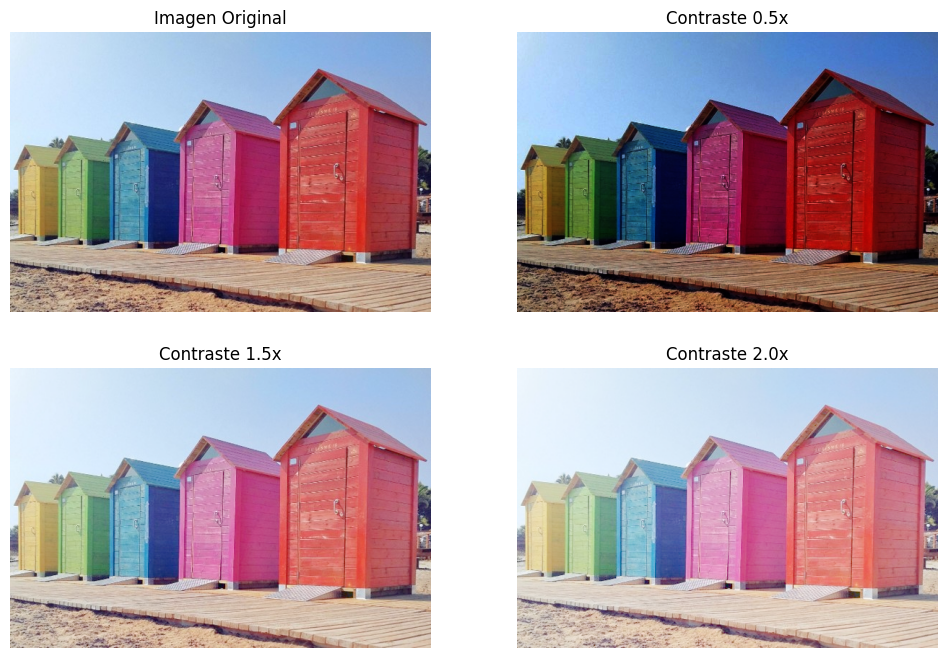

In [ ]:
from skimage import exposure
contrast_factors = [0.5, 1.5, 2.0] # factores de contraste

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

for i, factor in enumerate(contrast_factors):
    # Ajusta contraste de la imagen
    imgContrast = exposure.adjust_gamma(imgColor, gamma=1/factor)

    axs[i + 1].imshow(imgContrast)
    axs[i + 1].set_title(f'Contraste {factor}x')
    axs[i + 1].axis('off')  # Ocultar ejes

plt.show()